In [1]:
# %load ~/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3


In [2]:
cpj = pd.read_csv('../data/Journalists Killed between 1992 and 2020.csv')
cpj.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2033 non-null   int64  
 1   combinedStatus            2033 non-null   object 
 2   fullName                  2033 non-null   object 
 3   sortName                  0 non-null      float64
 4   primaryNationality        1313 non-null   object 
 5   secondaryNationality      4 non-null      object 
 6   tertiaryNationality       0 non-null      float64
 7   gender                    1459 non-null   object 
 8   photoUrl                  431 non-null    object 
 9   photoCredit               267 non-null    object 
 10  type                      2033 non-null   object 
 11  lastStatus                231 non-null    object 
 12  typeOfDeath               1369 non-null   object 
 13  status                    2033 non-null   object 
 14  employed

In [4]:
# drop columns with all nulls
drop_cols=['sortName','secondaryNationality','tertiaryNationality','charges','motive','lengthOfSentence','healthProblems','impCountry','entry','sentenceDate','sentence','locationImprisoned']
cpj.drop(drop_cols,axis=1,inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      2033 non-null   int64 
 1   combinedStatus            2033 non-null   object
 2   fullName                  2033 non-null   object
 3   primaryNationality        1313 non-null   object
 4   gender                    1459 non-null   object
 5   photoUrl                  431 non-null    object
 6   photoCredit               267 non-null    object
 7   type                      2033 non-null   object
 8   lastStatus                231 non-null    object
 9   typeOfDeath               1369 non-null   object
 10  status                    2033 non-null   object
 11  employedAs                2025 non-null   object
 12  organizations             2032 non-null   object
 13  jobs                      1398 non-null   object
 14  coverage                

In [5]:
cpj['combinedStatus'].value_counts()

Confirmed      1473
Unconfirmed     550
Killed           10
Name: combinedStatus, dtype: int64

In [6]:
cpj['motiveConfirmed'].value_counts()

Confirmed      1369
Unconfirmed     550
Name: motiveConfirmed, dtype: int64

In [7]:
cpj['status'].value_counts()

Killed    2033
Name: status, dtype: int64

In [8]:
cpj['type'].value_counts()

Journalist      1919
Media Worker     114
Name: type, dtype: int64

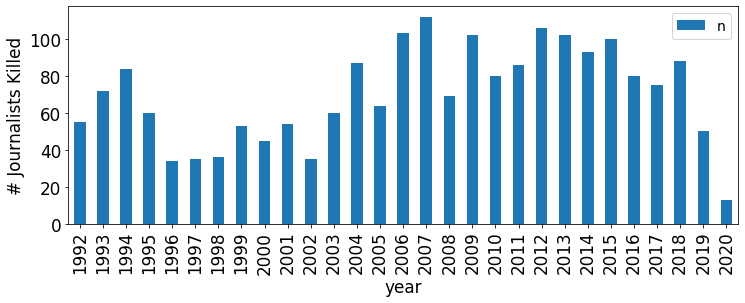

In [20]:
cpj.groupby('year').count().reset_index().loc[:,['year','combinedStatus']].plot(kind='bar',x='year',y='combinedStatus',figsize=(12,4))
plt.ylabel('# Journalists Killed')
plt.legend('n')
plt.savefig('../images/TotalDeathsVsYear.png',bbox_inches='tight')

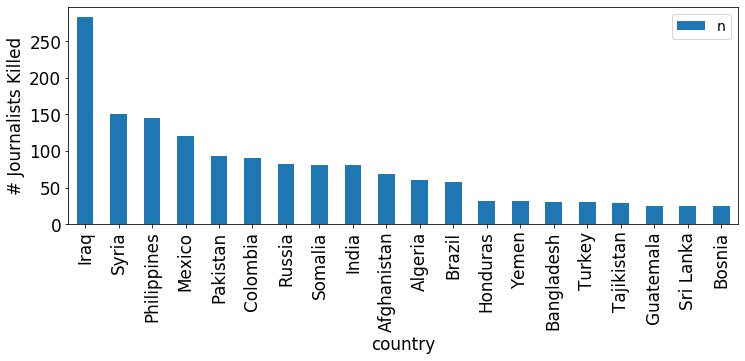

In [25]:
cpj.groupby('country').count().reset_index().loc[:,['country','year']].sort_values('year',ascending=False).head(20).plot(kind='bar',x='country',y='year',figsize=(12,4))
plt.ylabel('# Journalists Killed')
plt.legend('n')
plt.savefig('../images/TotalDeathsByCountry.png',bbox_inches='tight')

In [23]:
FT = pd.read_csv('../data/incidents.csv')
FT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   title                                        449 non-null    object 
 1   slug                                         449 non-null    object 
 2   first_published_at                           449 non-null    object 
 3   last_published_at                            449 non-null    object 
 4   latest_revision_created_at                   449 non-null    object 
 5   authors                                      0 non-null      float64
 6   updates                                      91 non-null     object 
 7   categories                                   448 non-null    object 
 8   links                                        207 non-null    object 
 9   equipment_seized                             33 non-null     object 
 10  eq

In [24]:
FT.head()

,title,slug,first_published_at,last_published_at,latest_revision_created_at,authors,updates,categories,links,equipment_seized,...,targets,targeted_institutions,tags,current_charges,dropped_charges,venue,target_nationality,workers_whose_communications_were_obtained,targets_whose_communications_were_obtained,politicians_or_public_figures_involved
0,Five members of neo-Nazi group arrested for al...,https://pressfreedomtracker.us/all-incidents/f...,2020-03-10 18:56:58.597549+00:00,2020-03-10 18:56:58.597549+00:00,2020-03-10 18:56:58.525989+00:00,NaN,NaN,Other Incident,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fresno Bee reporters barred from event with ca...,https://pressfreedomtracker.us/all-incidents/f...,2020-02-27 16:50:35.363402+00:00,2020-02-27 16:50:35.363402+00:00,2020-02-27 16:50:35.293448+00:00,NaN,NaN,Denial of Access,NaN,NaN,...,NaN,The Fresno Bee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Devin Nunes
2,State Department Classifies Five Chinese State...,https://pressfreedomtracker.us/all-incidents/s...,2020-02-28 20:20:00.400052+00:00,2020-03-17 18:21:36.001122+00:00,2020-03-17 18:21:35.937076+00:00,NaN,(2020-03-02 10:57:00+00:00) Four of the five C...,Other Incident,NaN,NaN,...,NaN,"Xinhua News Agency, China Global Television Ne...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FBI arrests man following threatening calls to...,https://pressfreedomtracker.us/all-incidents/f...,2020-03-10 18:33:49.887425+00:00,2020-03-10 18:33:49.887425+00:00,2020-03-10 18:33:49.810405+00:00,NaN,NaN,Other Incident,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"NYPD arrests photojournalist, charges him with...",https://pressfreedomtracker.us/all-incidents/n...,2020-02-14 21:28:47.367239+00:00,2020-02-14 21:28:47.367239+00:00,2020-02-14 21:28:47.314870+00:00,NaN,NaN,Arrest / Criminal Charge,NaN,NaN,...,Amr Afiky,NaN,NaN,disorderly conduct,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
FT['state'].value_counts()

California (CA)         63
District of Columbia    61
New York (NY)           38
None                    30
Illinois (IL)           24
Missouri (MO)           21
Florida (FL)            16
Virginia (VA)           13
Texas (TX)              13
Oregon (OR)             12
North Dakota (ND)       10
Georgia (GA)             8
Puerto Rico (PR)         8
Pennsylvania (PA)        7
Massachusetts (MA)       7
Colorado (CO)            6
North Carolina           6
Arizona (AZ)             6
Iowa (IA)                6
Minnesota (MN)           6
Ohio (OH)                5
Maryland (MD)            5
Tennessee (TN)           5
Michigan (MI)            5
New Jersey (NJ)          5
Arkansas (AR)            5
Kansas (KS)              4
New Mexico (NM)          4
Washington (WA)          4
Wisconsin (WI)           3
Alabama (AL)             3
NY                       3
Nevada (NV)              3
Montana (MT)             3
Indiana (IN)             3
Canada                   3
Louisiana (LA)           3
S

In [44]:
FT['city'].value_counts()

Washington     63
None           47
New York       28
St. Louis      19
Chicago        15
               ..
Albequerque     1
Punta Gorda     1
Tucson          1
Bozeman         1
Oxon Hill       1
Name: city, Length: 163, dtype: int64

In [45]:
FT['categories'].value_counts()

Physical Attack                                                                             89
Subpoena / Legal Order                                                                      61
Other Incident                                                                              53
Denial of Access                                                                            46
Chilling Statement                                                                          39
Arrest / Criminal Charge                                                                    35
Border Stop                                                                                 27
Physical Attack, Equipment Damage                                                           20
Arrest / Criminal Charge, Equipment Search or Seizure                                       17
Border Stop, Equipment Search or Seizure                                                    16
Prior Restraint                                   